#Taller N° 1
Integrantes:

*   Gabriela Garbiras
*   Lucía Ramírez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
!pip install --quiet yfinance
import yfinance as yf
import pandas_datareader.data as pdr
import scipy.stats as stats
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.6 MB/s eta 0:00:00


Punto N° 1

In [2]:
yf.pdr_override()

In [3]:
activos = ['NFLX','KO']
inicio = '2021-01-01'
fin = '2022-12-31'
Precios1 = pdr.DataReader(activos,inicio,fin)['Adj Close'].dropna()
Precios2 = pdr.DataReader(activos,inicio,fin,interval='1mo')['Adj Close'].dropna()
Precios3 = Precios1.resample('A').last()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [4]:
#Retornos logarítmicos
r_log_diarios = np.log(Precios1/Precios1.shift(1)).dropna()
r_log_mes = np.log(Precios2/Precios2.shift(1)).dropna()
r_log_año = np.log(Precios3/Precios3.shift(1)).dropna()
Tabla = pd.merge(pd.merge(r_log_diarios,r_log_mes,on='Date',suffixes=(' Día',' Mes')),r_log_año,on='Date',suffixes=(' Año'))
Tabla

,KO Día,NFLX Día,KO Mes,NFLX Mes,KO,NFLX
Date,,,,,,


In [5]:
#Tabla de retornos diarios
r_log_diarios

,KO,NFLX
Date,,
2021-01-05,-0.011054,-0.003948
2021-01-06,-0.032330,-0.039778
2021-01-07,-0.011147,0.016644
2021-01-08,0.022170,0.002963
2021-01-11,-0.017378,-0.022388
...,...,...
2022-12-23,0.007550,-0.009414
2022-12-27,0.006092,-0.037267
2022-12-28,-0.010017,-0.025988


In [6]:
# Tabla de retornos mensuales
r_log_mes

,KO,NFLX
Date,,
2021-02-01,0.017295,0.012061
2021-03-01,0.073189,-0.032421
2021-04-01,0.032097,-0.015824
2021-05-01,0.023978,-0.020979
2021-06-01,-0.021573,0.049282
2021-07-01,0.060065,-0.020349
2021-08-01,-0.012705,0.095070
2021-09-01,-0.070631,0.069802
2021-10-01,0.079214,0.123125


In [7]:
# Tabla de retornos anuales
r_log_año

,KO,NFLX
Date,,
2022-12-31,0.100836,-0.71442


In [8]:
# Retornos esperados anualizados diarioas
rd_esperados = np.log(1+r_log_diarios)
rd_esperados*np.sqrt(252)

,KO,NFLX
Date,,
2021-01-05,-0.176454,-0.062791
2021-01-06,-0.521702,-0.644366
2021-01-07,-0.177940,0.262045
2021-01-08,0.348098,0.046964
2021-01-11,-0.278294,-0.359441
...,...,...
2022-12-23,0.119396,-0.150158
2022-12-27,0.096419,-0.602901
2022-12-28,-0.159821,-0.418010


In [9]:
# Retornos esperados anualizados mensuales
rm_esperados = np.log(1+r_log_mes)
rm_esperados*np.sqrt(12)

,KO,NFLX
Date,,
2021-02-01,0.059399,0.041530
2021-03-01,0.244686,-0.114171
2021-04-01,0.109441,-0.055256
2021-05-01,0.082084,-0.073447
2021-06-01,-0.075549,0.166643
2021-07-01,0.202062,-0.071219
2021-08-01,-0.044294,0.314602
2021-09-01,-0.253742,0.233735
2021-10-01,0.264080,0.402233


In [10]:
# Retornos esperados anualizados
np.log(1+r_log_año)

,KO,NFLX
Date,,
2022-12-31,0.09607,-1.253232


In [11]:
Precios_1 = pdr.DataReader(activos,inicio,fin).dropna()
Precios_2 = pdr.DataReader(activos,inicio,fin,interval='1mo').dropna()
Precios_3 = Precios1.resample('A').last()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


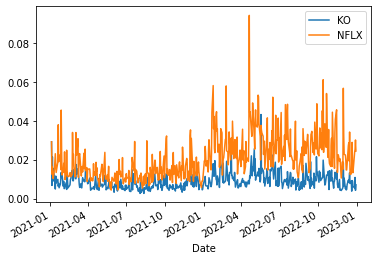

In [12]:
# Volatilidades anualizadas diarias
lnHL = np.log(Precios_1["High"]/Precios_1["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot();

In [13]:
# Volatilidades anualizadas mensuales
(sigmaPark_d.mean())*np.sqrt(30)

KO      0.049342
NFLX    0.114987
dtype: float64

In [14]:
# Volatilidades anualizadas
(sigmaPark_d.mean())*np.sqrt(252)

KO      0.143007
NFLX    0.333264
dtype: float64

In [15]:
# Estadistica descriptiva
Precios1.describe()

,KO,NFLX
count,503.000000,503.000000
mean,56.164325,421.700417
std,5.238569,157.378186
min,45.337097,166.369995
25%,52.027998,251.980003
50%,55.886574,493.329987
75%,60.802338,546.619995
max,64.799706,691.690002


In [16]:
Precios1.kurt()

KO     -1.093044
NFLX   -1.398017
dtype: float64

In [17]:
Precios1.skew()

KO     -0.150630
NFLX   -0.178405
dtype: float64

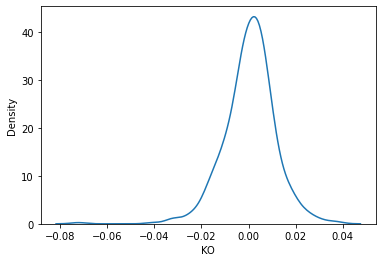

In [18]:
# Distribución empírica
sns.kdeplot(r_log_diarios['KO']);

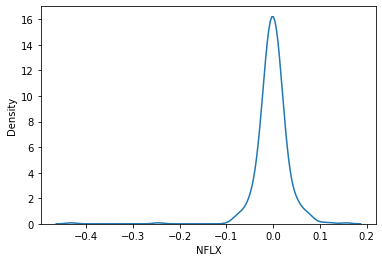

In [19]:
# Distribución empírica
sns.kdeplot(r_log_diarios['NFLX']);

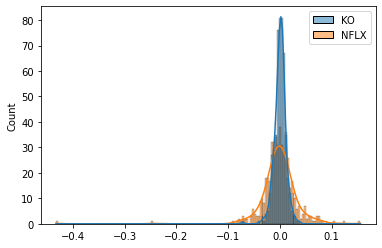

In [20]:
# Distribución teórica normal
sns.histplot(r_log_diarios, kde=True);

In [21]:
# Matriz de correlación de Pearson
r_log_diarios['KO'].corr(r_log_diarios['NFLX'],method="pearson")

0.1554692082603899

In [22]:
# Matriz de correlación de rango de Kendall
r_log_diarios['KO'].corr(r_log_diarios['NFLX'], method='kendall')

0.12076293931332314

In [23]:
# Matriz de correlación de Spearman
r_log_diarios['KO'].corr(r_log_diarios['NFLX'], method='spearman')

0.17500845002766408

Punto N° 2

In [24]:
A = 'AMZN','AXP','IBM','INTC','NKE','JPM','PFE','META','V','BA'
comienza = '2017-12-1'
termina = '2022-12-1'
periodicity = '1mo'
P = yf.download(A,start=comienza,end=termina,interval=periodicity)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [68]:
retorno_mes = np.log(P).diff().dropna()
retorno_año = retorno_mes.mean()*12
retorno_año

AMZN    0.101976
AXP     0.108394
BA     -0.091893
IBM     0.049406
INTC   -0.061713
JPM     0.081607
META   -0.081674
NKE     0.124347
PFE     0.112068
V       0.137110
dtype: float64

In [72]:
Volatilidades = retorno_mes.std()*np.sqrt(12)
Volatilidades

AMZN    0.334547
AXP     0.292563
BA      0.491073
IBM     0.272234
INTC    0.285439
JPM     0.279903
META    0.405640
NKE     0.293928
PFE     0.254328
V       0.236238
dtype: float64

In [74]:
# Organizar los activos segun su retorno
Datos = pd.concat([retorno_año,Volatilidades], axis=1)
Datos.columns = ["Retorno","Volatilidad"]
Datos.sort_values("Retorno",ascending=False)

,Retorno,Volatilidad
V,0.137110,0.236238
NKE,0.124347,0.293928
PFE,0.112068,0.254328
AXP,0.108394,0.292563
AMZN,0.101976,0.334547
JPM,0.081607,0.279903
IBM,0.049406,0.272234
INTC,-0.061713,0.285439
META,-0.081674,0.405640
BA,-0.091893,0.491073


Punto N°3

In [ ]:
date1 = '2011-12-1'
date2 = '2022-12-31'
mes = '1mo'
Activo = yf.download('^RUT',start=date1,end=date2,interval=mes)['Adj Close']
Symbols = yf.download('^RUT',start=date1,end=date2)['Adj Close']
retorn = np.log(Symbols/Symbols.shift(1)).dropna()
returns = np.log(Activo/Activo.shift(1)).dropna()
Actives = yf.download('^RUT',start=date1,end=date2,interval=mes)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Volatilidad desviación estándar mensual
Sigma_std_1 = returns.std()
Sigma_std_1

0.05474479591479422

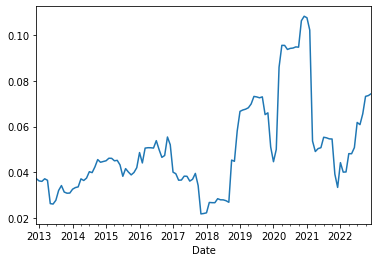

In [ ]:
# Volatilidad desviación estándar anualizada
Sigma_std = returns.rolling(window=12).std().dropna()
Sigma_std.plot();

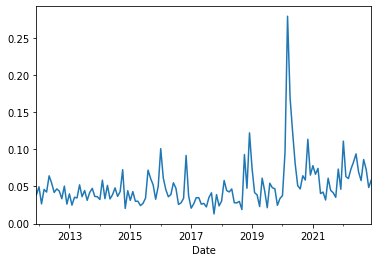

In [ ]:
# Volatilidad Parkinson
# Mensual
lnHL = np.log(Actives["High"]/Actives["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot();

In [ ]:
# Volatilidad anulizada de Parkinson
(sigmaPark_d.mean())*np.sqrt(12)

0.1767113126308943

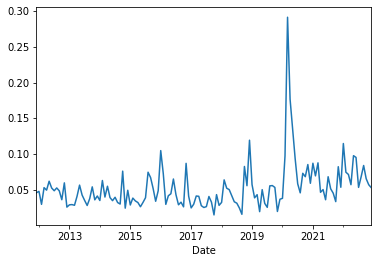

In [ ]:
# Volatilidad mensual Garman-Klass
lnHL = np.log(Actives["High"]/Actives["Low"]).dropna()
lnCO = np.log(Actives["Close"]/Actives["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot();

In [ ]:
#volatilidad anualizada Garman-Klass
(sigmaGK_d.mean())*np.sqrt(12)

0.1815139038491142

In [ ]:
# Volatilidad mensual EWMA
def ewma_vol(returns,Lambda):
  k = len(returns)                
  e = np.arange(k-1,-1,-1)           
  alpha = Lambda**e                  
  s_var = (returns**2)*alpha        
  var = s_var.sum()*(1-Lambda)         
  vol = np.sqrt(var)                   
  return(vol)
vol_ewma = ewma_vol(returns,Lambda=0.94)
vol_ewma

0.06830769009655513

In [ ]:
# Volatilidad anual EWMA
vol_ewma*np.sqrt(12)

0.23662477958980582